In [15]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf


train = pd.read_csv('data/train_features.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test = pd.read_csv('data/test_features.csv')
submission = pd.read_csv('data/sample_submission.csv')

X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
y = tf.keras.utils.to_categorical(train_labels['label']) 
X.shape

TensorShape([3125, 600, 6])

In [3]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 18s 325ms/step - loss: 2.8035 - accuracy: 0.4475 - val_loss: 2.3279 - val_accuracy: 0.5328
Epoch 2/100
40/40 [==============================] - 10s 254ms/step - loss: 2.2821 - accuracy: 0.5205 - val_loss: 2.1702 - val_accuracy: 0.5360
Epoch 3/100
40/40 [==============================] - 10s 259ms/step - loss: 2.0843 - accuracy: 0.5374 - val_loss: 2.0183 - val_accuracy: 0.5424
Epoch 4/100
40/40 [==============================] - 11s 280ms/step - loss: 1.9861 - accuracy: 0.5332 - val_loss: 1.9016 - val_accuracy: 0.5632
Epoch 5/100
40/40 [==============================] - 11s 285ms/step - loss: 1.8228 - accuracy: 0.5612 - val_loss: 1.7454 - val_accuracy: 0.5888
Epoch 6/100
40/40 [==============================] - 10s 252ms/step - loss: 1.6944 - accuracy: 0.5822 - val_loss: 1.6649 - val_accuracy: 0.5904
Epoch 7/100
40/40 [==============================] - 10s 245ms/step - loss: 1.4844 - accuracy: 0.6248 - val_loss: 1.6035 - val_accuracy:

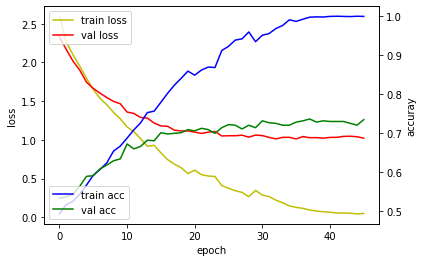

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [5]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/cnn_Bilstm.csv', index=False)

In [6]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 36s 758ms/step - loss: 2.9342 - accuracy: 0.4377 - val_loss: 2.4280 - val_accuracy: 0.5232
Epoch 2/100
40/40 [==============================] - 31s 774ms/step - loss: 2.3705 - accuracy: 0.4983 - val_loss: 2.2282 - val_accuracy: 0.5264
Epoch 3/100
40/40 [==============================] - 33s 815ms/step - loss: 2.0631 - accuracy: 0.5281 - val_loss: 2.0187 - val_accuracy: 0.5408
Epoch 4/100
40/40 [==============================] - 31s 781ms/step - loss: 1.8602 - accuracy: 0.5426 - val_loss: 1.8953 - val_accuracy: 0.5424
Epoch 5/100
40/40 [==============================] - 31s 773ms/step - loss: 1.7128 - accuracy: 0.5668 - val_loss: 1.8336 - val_accuracy: 0.5904
Epoch 6/100
40/40 [==============================] - 33s 817ms/step - loss: 1.5489 - accuracy: 0.6148 - val_loss: 1.6506 - val_accuracy: 0.6016
Epoch 7/100
40/40 [==============================] - 33s 816ms/step - loss: 1.4594 - accuracy: 0.6317 - val_loss: 1.6067 - val_accuracy:

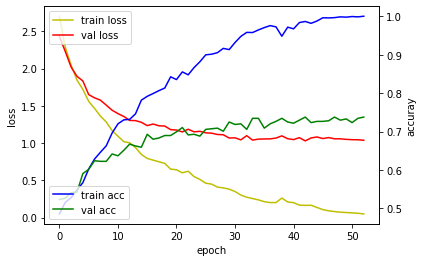

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [8]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/1cnn_Bilstm.csv', index=False)

In [16]:
### Leaky ReLU
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional
from keras.layers import Flatten
import tensorflow as tf

# 2. 모델 구성하기
leaky_relu = tf.nn.leaky_relu

model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation=leaky_relu, strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation=leaky_relu, strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(61, activation='softmax'))

    # 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 35s 617ms/step - loss: 2.8696 - accuracy: 0.4409 - val_loss: 2.3346 - val_accuracy: 0.5312
Epoch 2/100
40/40 [==============================] - 22s 546ms/step - loss: 2.2668 - accuracy: 0.5261 - val_loss: 2.1634 - val_accuracy: 0.5424
Epoch 3/100
40/40 [==============================] - 20s 497ms/step - loss: 2.0567 - accuracy: 0.5359 - val_loss: 2.0343 - val_accuracy: 0.5392
Epoch 4/100
40/40 [==============================] - 22s 550ms/step - loss: 1.9179 - accuracy: 0.5367 - val_loss: 1.8915 - val_accuracy: 0.5584
Epoch 5/100
40/40 [==============================] - 20s 504ms/step - loss: 1.7127 - accuracy: 0.5739 - val_loss: 1.7793 - val_accuracy: 0.5728
Epoch 6/100
40/40 [==============================] - 18s 448ms/step - loss: 1.6490 - accuracy: 0.5866 - val_loss: 1.7245 - val_accuracy: 0.5856
Epoch 7/100
40/40 [==============================] - 22s 544ms/step - loss: 1.5252 - accuracy: 0.5996 - val_loss: 1.6309 - val_accuracy:

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
padding = ['valid', 'same']
activation1 = ['relu', leaky_relu]
activation2 = ['relu', leaky_relu]
optimizer = ['adam', 'rmsprop']
pool_size = [2,4]
size = [64, 128, 256]

cv_scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=200)

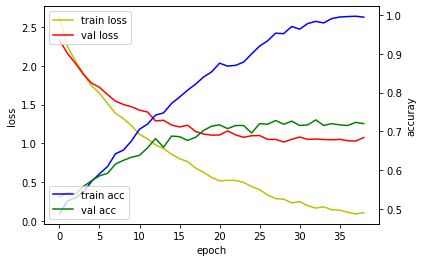

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [18]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/cnn_biLstm_leakyrelu.csv', index=False)

In [19]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='same', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='same', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 30s 531ms/step - loss: 2.8186 - accuracy: 0.4502 - val_loss: 2.3453 - val_accuracy: 0.5312
Epoch 2/100
40/40 [==============================] - 20s 492ms/step - loss: 2.3084 - accuracy: 0.5167 - val_loss: 2.1782 - val_accuracy: 0.5312
Epoch 3/100
40/40 [==============================] - 18s 440ms/step - loss: 2.1642 - accuracy: 0.5095 - val_loss: 2.0471 - val_accuracy: 0.5424
Epoch 4/100
40/40 [==============================] - 17s 427ms/step - loss: 1.9767 - accuracy: 0.5393 - val_loss: 1.9762 - val_accuracy: 0.5568
Epoch 5/100
40/40 [==============================] - 17s 427ms/step - loss: 1.8811 - accuracy: 0.5534 - val_loss: 1.8976 - val_accuracy: 0.5904
Epoch 6/100
40/40 [==============================] - 16s 407ms/step - loss: 1.7309 - accuracy: 0.5721 - val_loss: 1.7772 - val_accuracy: 0.5808
Epoch 7/100
40/40 [==============================] - 17s 420ms/step - loss: 1.5940 - accuracy: 0.5945 - val_loss: 1.6674 - val_accuracy:

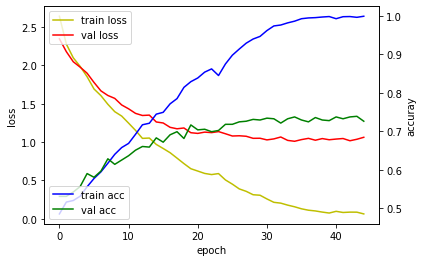

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [21]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/cnn_biLstm_same.csv', index=False)

In [22]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling1D, Bidirectional
from keras.layers import Flatten

# 2. 모델 구성하기
model = Sequential()
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(61, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 4. 모델 학습시키기
hist = model.fit(X, y, epochs=100, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 27s 508ms/step - loss: 2.9816 - accuracy: 0.4326 - val_loss: 2.4507 - val_accuracy: 0.5264
Epoch 2/100
40/40 [==============================] - 15s 380ms/step - loss: 2.3360 - accuracy: 0.5235 - val_loss: 2.4440 - val_accuracy: 0.5472
Epoch 3/100
40/40 [==============================] - 15s 377ms/step - loss: 2.2057 - accuracy: 0.5227 - val_loss: 2.1428 - val_accuracy: 0.5360
Epoch 4/100
40/40 [==============================] - 14s 362ms/step - loss: 2.0498 - accuracy: 0.5261 - val_loss: 2.0870 - val_accuracy: 0.5392
Epoch 5/100
40/40 [==============================] - 14s 356ms/step - loss: 1.8643 - accuracy: 0.5564 - val_loss: 1.8841 - val_accuracy: 0.5680
Epoch 6/100
40/40 [==============================] - 14s 361ms/step - loss: 1.7175 - accuracy: 0.5761 - val_loss: 1.9595 - val_accuracy: 0.5488
Epoch 7/100
40/40 [==============================] - 18s 448ms/step - loss: 1.6324 - accuracy: 0.5838 - val_loss: 1.7013 - val_accuracy:

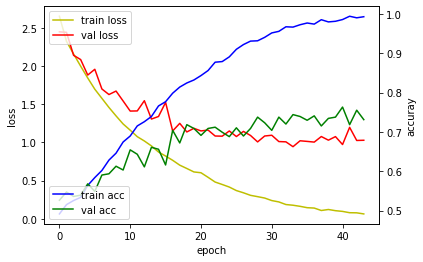

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [24]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape
prediction=model.predict(test_X)
submission.iloc[:,1:]=prediction
submission.to_csv('output/cnn_biLstm_rmsprop.csv', index=False)